# import packages & dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score

In [3]:
df_traintran = pd.read_csv('train_transaction.csv')

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# handle missing values

In [5]:
numericalist_traintran = df_traintran.drop(columns = ['ProductCD', 'card4', 'card6', 'M1', 'M2', 'M3',
                                            'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'P_emaildomain', 'R_emaildomain'])
strlist_traintran = df_traintran[['ProductCD', 'card4', 'card6', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'P_emaildomain', 'R_emaildomain']]

In [ ]:
# df_traintran_bat = np.array_split(df_traintran, 1000)

In [ ]:
# for i in numericalist_traintran.columns:
#     df_traintran_bat[0][i].fillna(value = df_traintran_bat[0][i].mean(), inplace = True)
# for i in strlist_traintran.columns:
#     df_traintran_bat[0][i].fillna(value = 'N/A', inplace = True)

In [7]:
for i in numericalist_traintran.columns:
     df_traintran[i].fillna(value = df_traintran[i].mean(), inplace = True)
for i in strlist_traintran.columns:
     df_traintran[i].fillna(value = 'N/A', inplace = True)

# preprocess columns w/ email domain

In [ ]:
# df_traintran_bat[0]['P_emaildomain1'] = [None] * len(df_traintran_bat[0]['P_emaildomain'])
# df_traintran_bat[0]['P_emaildomain2'] = [None] * len(df_traintran_bat[0]['P_emaildomain'])
# df_traintran_bat[0]['P_emaildomain3'] = [None] * len(df_traintran_bat[0]['P_emaildomain'])

# for i in range(len(df_traintran_bat[0]['P_emaildomain'])):
#     df_traintran_bat[0]['P_emaildomain'][i] = ''.join(df_traintran_bat[0]['P_emaildomain'][i]).split('.')
#     df_traintran_bat[0]['P_emaildomain1'][i] = df_traintran_bat[0]['P_emaildomain'][i][0]
#     df_traintran_bat[0]['P_emaildomain2'][i] = 'N/A'
#     df_traintran_bat[0]['P_emaildomain3'][i] = 'N/A'
#     if len(df_traintran_bat[0]['P_emaildomain'][i]) == 2:
#         df_traintran_bat[0]['P_emaildomain2'][i] = df_traintran_bat[0]['P_emaildomain'][i][1]
#     elif len(df_traintran_bat[0]['P_emaildomain'][i]) == 3:
#         df_traintran_bat[0]['P_emaildomain3'][i] = df_traintran_bat[0]['P_emaildomain'][i][2]

In [ ]:
# df_traintran_bat[0]['R_emaildomain1'] = [None] * len(df_traintran_bat[0]['R_emaildomain'])
# df_traintran_bat[0]['R_emaildomain2'] = [None] * len(df_traintran_bat[0]['R_emaildomain'])
# df_traintran_bat[0]['R_emaildomain3'] = [None] * len(df_traintran_bat[0]['R_emaildomain'])

# for i in range(len(df_traintran_bat[0]['R_emaildomain'])):
#     df_traintran_bat[0]['R_emaildomain'][i] = ''.join(df_traintran_bat[0]['R_emaildomain'][i]).split('.')
#     df_traintran_bat[0]['R_emaildomain1'][i] = df_traintran_bat[0]['R_emaildomain'][i][0]
#     df_traintran_bat[0]['R_emaildomain2'][i] = 'N/A'
#     df_traintran_bat[0]['R_emaildomain3'][i] = 'N/A'
#     if len(df_traintran_bat[0]['R_emaildomain'][i]) == 2:
#         df_traintran_bat[0]['R_emaildomain2'][i] = df_traintran_bat[0]['R_emaildomain'][i][1]
#     elif len(df_traintran_bat[0]['R_emaildomain'][i]) == 3:
#         df_traintran_bat[0]['R_emaildomain3'][i] = df_traintran_bat[0]['R_emaildomain'][i][2]

In [ ]:
# df_traintran_bat[0].head(20)

In [8]:
df_traintran['P_emaildomain1'] = [None] * len(df_traintran['P_emaildomain'])
df_traintran['P_emaildomain2'] = [None] * len(df_traintran['P_emaildomain'])
df_traintran['P_emaildomain3'] = [None] * len(df_traintran['P_emaildomain'])

for i in range(len(df_traintran['P_emaildomain'])):
    df_traintran['P_emaildomain'][i] = ''.join(df_traintran['P_emaildomain'][i]).split('.')
    df_traintran['P_emaildomain1'][i] = df_traintran['P_emaildomain'][i][0]
    df_traintran['P_emaildomain2'][i] = 'N/A'
    df_traintran['P_emaildomain3'][i] = 'N/A'
    if len(df_traintran['P_emaildomain'][i]) == 2:
        df_traintran['P_emaildomain2'][i] = df_traintran['P_emaildomain'][i][1]
    elif len(df_traintran['P_emaildomain'][i]) == 3:
        df_traintran['P_emaildomain3'][i] = df_traintran['P_emaildomain'][i][2]

/var/folders/65/fvxx2trn5hz0gj752ylgjg7h0000gn/T/ipykernel_82558/3844849195.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traintran['P_emaildomain'][i] = ''.join(df_traintran['P_emaildomain'][i]).split('.')
/var/folders/65/fvxx2trn5hz0gj752ylgjg7h0000gn/T/ipykernel_82558/3844849195.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traintran['P_emaildomain1'][i] = df_traintran['P_emaildomain'][i][0]
/var/folders/65/fvxx2trn5hz0gj752ylgjg7h0000gn/T/ipykernel_82558/3844849195.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation

In [9]:
df_traintran['R_emaildomain1'] = [None] * len(df_traintran['R_emaildomain'])
df_traintran['R_emaildomain2'] = [None] * len(df_traintran['R_emaildomain'])
df_traintran['R_emaildomain3'] = [None] * len(df_traintran['R_emaildomain'])

for i in range(len(df_traintran['R_emaildomain'])):
    df_traintran['R_emaildomain'][i] = ''.join(df_traintran['R_emaildomain'][i]).split('.')
    df_traintran['R_emaildomain1'][i] = df_traintran['R_emaildomain'][i][0]
    df_traintran['R_emaildomain2'][i] = 'N/A'
    df_traintran['R_emaildomain3'][i] = 'N/A'
    if len(df_traintran['R_emaildomain'][i]) == 2:
        df_traintran['R_emaildomain2'][i] = df_traintran['R_emaildomain'][i][1]
    elif len(df_traintran['R_emaildomain'][i]) == 3:
        df_traintran['R_emaildomain3'][i] = df_traintran['R_emaildomain'][i][2]

/var/folders/65/fvxx2trn5hz0gj752ylgjg7h0000gn/T/ipykernel_82558/1950029477.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traintran['R_emaildomain'][i] = ''.join(df_traintran['R_emaildomain'][i]).split('.')
/var/folders/65/fvxx2trn5hz0gj752ylgjg7h0000gn/T/ipykernel_82558/1950029477.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traintran['R_emaildomain1'][i] = df_traintran['R_emaildomain'][i][0]
/var/folders/65/fvxx2trn5hz0gj752ylgjg7h0000gn/T/ipykernel_82558/1950029477.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation

# one hot encoding

In [10]:
strlist_update = ['ProductCD', 'card4', 'card6', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9',
                  'P_emaildomain1', 'P_emaildomain2', 'P_emaildomain3', 'R_emaildomain1', 'R_emaildomain2',
                 'R_emaildomain3']
# batch0_onehotencode = pd.get_dummies(df_traintran_bat[0], columns = strlist_update)
df_traintran_onehotencode = pd.get_dummies(df_traintran, columns = strlist_update)

In [11]:
# batch0_onehotencode = batch0_onehotencode.drop(columns = ['P_emaildomain', 'R_emaildomain'])
df_traintran_onehotencode = df_traintran_onehotencode.drop(columns = ['P_emaildomain', 'R_emaildomain'])

# correlation

In [37]:
corrs_sorted = abs(df_traintran_onehotencode.corr()['isFraud']).sort_values(ascending = False)

In [40]:
filtered_corrs = corrs_sorted.dropna()

In [41]:
print(filtered_corrs)

isFraud                        1.000000
V257                           0.262946
V246                           0.251838
V244                           0.249951
V242                           0.247522
V45                            0.236688
V201                           0.234520
V200                           0.227926
V86                            0.224530
V87                            0.224450
V189                           0.220374
V44                            0.218669
V188                           0.217058
V258                           0.203975
V52                            0.201111
V51                            0.187440
V228                           0.184556
V170                           0.178601
V40                            0.178413
V79                            0.173097
V39                            0.170565
V94                            0.167984
V38                            0.167128
V43                            0.166514
V33                            0.165534


# train a GBDT model

In [42]:
testers = ['V257', 'V246', 'V244', 'ProductCD_C',
           'card3', 'R_emaildomain1_gmail', 'R_emaildomain2_com', 
           'M4_M2', 'R_emaildomain2_N/A', 'R_emaildomain1_N/A', 
           'ProductCD_W', 'card6_credit', 'card6_debit', 
           'M1_T','M2_T','D8', 'D15', 'M7_F', 
           'R_emaildomain1_hotmail', 'R_emaildomain1_outlook',
           'R_emaildomain1_protonmail', 'R_emaildomain1_icloud', 
           'addr2', 'P_emaildomain1_protonmail','C6'] 
# pick 25 columns based on sorted correlation coefficient list

df_testing = df_traintran_onehotencode[testers]
df_testing['isFraud'] = df_traintran_onehotencode['isFraud']
X = df_testing[testers]
y = df_testing['isFraud']

/var/folders/65/fvxx2trn5hz0gj752ylgjg7h0000gn/T/ipykernel_82558/1023906810.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['isFraud'] = df_traintran_onehotencode['isFraud']


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [44]:
param_grid = {
    "loss":["log_loss"], # log-loss loss function
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    # "min_samples_split": np.linspace(0.1, 0.5, 12),
    # "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    # "max_features":["log2","sqrt"],
    # "criterion": ["friedman_mse",  "mae"],
    # "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[50]
    }

In [45]:
print('Running Grid Search...')
model = GradientBoostingClassifier()
grid = GridSearchCV(model, param_grid, cv = 5)
grid_search = grid.fit(X_train, y_train)
grid_search
print('Done')

Running Grid Search...
Done


In [46]:
best_d = grid_search.best_estimator_.max_depth
print(best_d)
best_lr = grid_search.best_estimator_.learning_rate
print(best_lr)

8
0.2


In [47]:
print('Begin GBDT Implementation...')

model_best = GradientBoostingClassifier(n_estimators = 50, max_depth = 8, learning_rate = 0.2)

model_best.fit(X_train, y_train)

probability_predictions = list(model_best.predict_proba(X_test)[:,1])

class_label_predictions = model_best.predict(X_test)

print('End')

Begin GBDT Implementation...
End


In [48]:
acc_score = accuracy_score(y_test, class_label_predictions)
print('Accuracy score: ' + str(acc_score))

c_m = confusion_matrix(y_test, class_label_predictions, labels=[True, False])

print('Confusion Matrix for the model: ')
pd.DataFrame(c_m, columns=['Predicted: Fraud', 'Predicted: Not Fraud'],
index=['Actual: Fraud', 'Actual: Not Fraud'])

Accuracy score: 0.9721468193083913
Confusion Matrix for the model: 


,Predicted: Fraud,Predicted: Not Fraud
Actual: Fraud,1868,4872
Actual: Not Fraud,556,187583


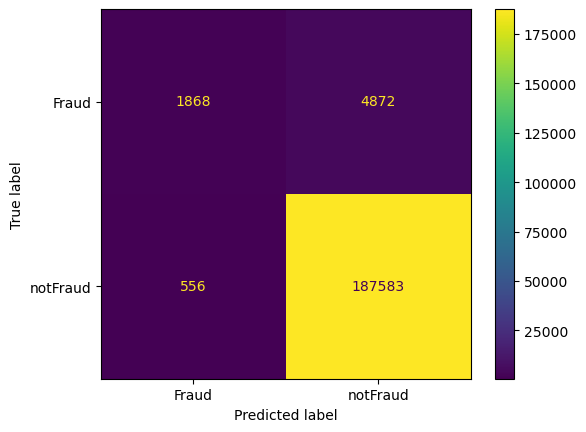

In [49]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_m, display_labels = ["Fraud", "notFraud"])
cm_display.plot()
plt.show()

In [50]:
print('Computing ROC Curve...')

fpr, tpr, thresholds = roc_curve(y_test, probability_predictions)

print('End')

Computing ROC Curve...
End


Plotting ROC Curve...


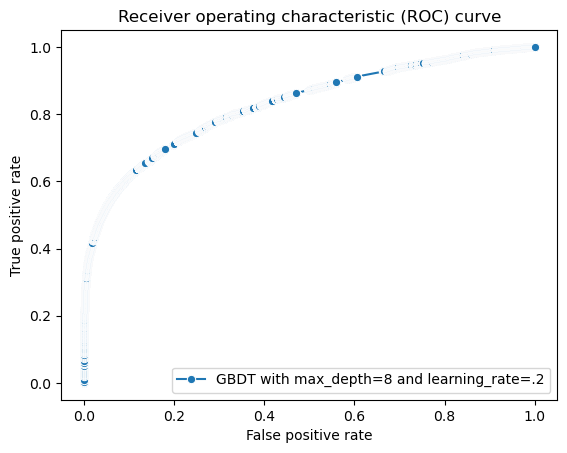

In [51]:
print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)


sns.lineplot(x=fpr, y=tpr, marker = 'o')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['GBDT with max_depth=8 and learning_rate=.2'])
plt.show()

In [52]:
auc1 = auc(fpr, tpr)

print("AUC of the GBDT model with a max depth of 8 and learning rate of .2 is {:.3f}".format(auc1))

AUC of the GBDT model with a max depth of 8 and learning rate of .2 is 0.831


In [53]:
print('Computing Precision-Recall Curve...')

precision, recall, thresholds = precision_recall_curve(y_test, probability_predictions)

print('End')

Computing Precision-Recall Curve...
End


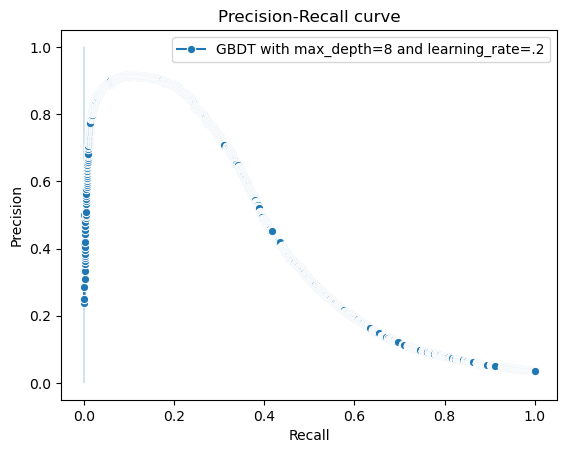

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=recall, y=precision, marker = 'o')

plt.title("Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(['GBDT with max_depth=8 and learning_rate=.2'])
plt.show()

In [55]:
auc2 = auc(recall, precision)

print("AUC of the GBDT model with a max depth of 8 and learning rate of .2 is {:.3f}".format(auc2))

AUC of the GBDT model with a max depth of 8 and learning rate of .2 is 0.418


In [56]:
f1 = f1_score(y_test, class_label_predictions)
print(f1)

0.40768223483195115


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, class_label_predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    188139
           1       0.77      0.28      0.41      6740

    accuracy                           0.97    194879
   macro avg       0.87      0.64      0.70    194879
weighted avg       0.97      0.97      0.97    194879



# apply the model to testing dataset

In [60]:
df_testran = pd.read_csv('test_transaction.csv')

In [64]:
X = df_testran

In [65]:
probability_predictions = list(model_best.predict_proba(X)[:,1])

class_label_predictions = model_best.predict(X)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- C1
- C10
- C11
- C12
- C13
- ...
Feature names seen at fit time, yet now missing:
- M1_T
- M2_T
- M4_M2
- M7_F
- P_emaildomain1_protonmail
- ...
